In [4]:
import os
import time

import yfinance as yf
import pandas as pd
import numpy as np
import glob

%matplotlib inline

In [7]:
# Getting all file paths

path = r'assets' # use your path
all_files = glob.glob(path + "/*.csv")

In [13]:
# Creating list to append all ticker dfs to
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

# Concat all ticker dfs 
stock_df = pd.concat(li, axis=0, ignore_index=True)

In [15]:
# Quick review of the df
stock_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sector,ticker
0,1990-02-16,0.0,0.059298,0.054786,0.057364,940636800.0,0.0,0.0,Technology,CSCO
1,1990-02-20,0.0,0.059297,0.055430,0.059297,151862400.0,0.0,0.0,Technology,CSCO
2,1990-02-21,0.0,0.058653,0.056075,0.058008,70531200.0,0.0,0.0,Technology,CSCO
3,1990-02-22,0.0,0.060586,0.058653,0.058653,45216000.0,0.0,0.0,Technology,CSCO
4,1990-02-23,0.0,0.059297,0.058008,0.058331,44697600.0,0.0,0.0,Technology,CSCO


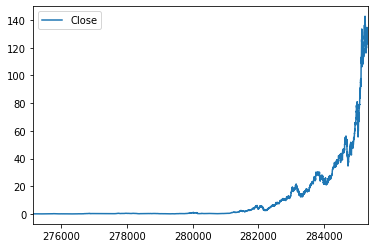

In [21]:
# Plotting one ticker to ensure data looks correct
stock_df[stock_df['ticker']=='AAPL'][['Date','Close']].plot()